In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
def plot_random_examples(x, y, p=None):
    indices = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    if p is None:
        p = y
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color=col)
    return plt

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 9ms/step - loss: 0.3786 - accuracy: 0.8844 - val_loss: 0.0841 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1201 - accuracy: 0.9639 - val_loss: 0.0597 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0907 - accuracy: 0.9719 - val_loss: 0.0569 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0431 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.0458 - val_accuracy: 0.9865
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0584 - accuracy: 0.9821 - val_loss: 0.0391 - val_accuracy: 0.9890
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0384 - val_accuracy: 0.9895
Epoch 

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023971300572156906
Test accuracy: 0.9914000034332275


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

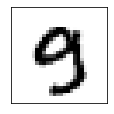

In [29]:
plot_random_examples(x_test, y_test, preds).show()

# Saving the model

In [14]:
model.save('mnist.h5') 

# Testing saved model

In [5]:
new_model = keras.models.load_model('mnist.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [18]:
score = new_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023971300572156906
Test accuracy: 0.9914000034332275


In [7]:
x_test[0].shape

(28, 28, 1)

In [9]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [41]:
preds = model.predict(x_test[0:1])
preds.shape

(1, 10)

https://keras.io/examples/vision/mnist_convnet/

# Export validation inputs and outputs

In [41]:
val_size = 100

In [42]:
indexes = [np.random.randint(10000, size=val_size)]
indexes

[array([1324, 8950, 5413, 3214,  991,  466, 7438, 5216, 6309,  514, 8194,
        1986, 9219, 9077, 2205, 7544, 2979, 6497, 5482, 8134, 4296, 6767,
        7968, 3188, 7458, 2899, 3382, 8349, 7681,   15, 9679, 9623, 6384,
        5450, 6399,  888, 7340, 9086, 4884, 3355, 7760, 2291, 2270, 1187,
        7574, 3883, 2302,  388, 1351,  117,  255, 7312,  343, 2649, 4643,
        1386, 2654, 4977, 9780, 4044, 6293,  213, 8113,  804, 9112, 8807,
        2454, 2576, 2358, 2934, 1067, 2432, 3425, 4071, 6314, 9412, 1233,
        7036, 7326, 1206, 7289, 4088, 3380, 3316, 9672, 5957,  100, 2084,
        2978, 5704, 3384, 1273, 6789, 3019, 4480, 4259, 2462,  254, 6019,
        8734])]

In [43]:
np.savetxt("mnist-input-100.csv", x_test[tuple(indexes)].reshape([val_size, 28*28]), delimiter=",")
np.savetxt("mnist-output-100.csv", y_test[tuple(indexes)], delimiter=",")